# Predicting if Job Canidates are Looking for a New Job

## Objective

Determine if job canidates are looking for a new job depending on certain features.

## Data Dictionary

- enrollee_id: Unique ID for the candidate

- city: City code

- city_ development _index: Development index of the city (scaled)

- gender: Gender of the candidate

- relevent_experience: Relevant experience of the candidate in years

- enrolled_university: Type of University course enrolled if any

- education_level: Education level of candidate

- major_discipline: Education major discipline of the candidate

- experience: Candidate total experience in years

- company_size: No of employees in current employer's company

- company_type: Type of current employer

- lastnewjob: Difference in years between previous job and current job

- training_hours: training hours completed

- target: 0 – Not looking for a job change, 1 – Looking for a job change

### Load Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
df = pd.read_csv("job_candidates.csv")

## Data Overview

In [3]:
df.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13513,11802,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,50-99,Early Stage Startup,1,57,0.0
17172,7355,city_53,0.740,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,326,0.0
852,12474,city_114,0.926,NaN,No relevent experience,no_enrollment,Masters,Other,15,100-500,Pvt Ltd,4,42,0.0
9271,26618,city_155,0.556,Male,Has relevent experience,Part time course,Masters,STEM,2,10000+,Pvt Ltd,1,69,1.0
12120,15812,city_136,0.897,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Pvt Ltd,>4,25,0.0
12246,4877,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,10000+,Pvt Ltd,>4,10,0.0
15555,31888,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,15,50-99,Pvt Ltd,1,46,0.0
15670,16751,city_67,0.855,Female,Has relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,158,1.0
1827,22355,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,10000+,Pvt Ltd,>4,17,0.0
6742,77,city_16,0.910,Male,No relevent experience,no_enrollment,Graduate,STEM,3,10000+,Pvt Ltd,1,78,1.0


<b>First Thoughts:<b>
- Enrollee_id is a unique feature and can be taken out
- City_ can be taken out and just have individual number
- Missing values in gender
- Missing values in major discipline
- Missing values in Company_Size
- Formating changes for Company_Size
- Formating changes for Company_Type
- Formating changes for last_new_job

In [4]:
df.shape

(19158, 14)

<b>19158 rows and 14 columns<b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<b>Null values in:<b> 
- gender 
- enrolled_university 
- education_level
- major_discipline
- experience
- company_size
- company_type
- last_new_job

### Numeric Features
- enrollee_ID
- city_devlopment_index
- experience
- company_size
- last_new_job
- training_hours

### Categorical Features
- city
- gender
- relevent_experience
- enrolled_university
- education_level
- major_discipline
- company_type
- target

In [6]:
# Number of missing values in each row
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
#checking the amount of unique values in each feature
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [8]:
#removing enrollee_id as it is a unique variable, do not want it to effect the amouont of duplicated values
df = df.drop(['enrollee_id'], axis=1)

In [9]:
#checking for duplicated values
df.duplicated().sum()

49

In [10]:
#Looking at statistics of numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


<b>Observations:<b>
- Possible outliers in training_hours both on the lower and higher end

In [11]:
# Looking at our target variable
df['target'].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

### Final Data Overview Observations:
- Majority of people did not take the product
- City_ can be taken out and just have individual number
- Missing values in gender
- Missing values in major discipline
- Missing values in Company_Size
- Formating changes for Company_Size
- Formating changes for Company_Type
- Formating changes for last_new_job
- Removed enrollee_id
- Look for outliers in training_hours
- 49 duplicated rows

## Data Preprocessing

### Handiling Duplicate Rows

In [12]:
#checking for duplicated values
df.duplicated().sum()

49

In [13]:
df = df.drop_duplicates()

In [14]:
#checking for duplicated values
df.duplicated().sum()

0

No more duplicated values

### Handling Outliers

In [15]:
#Looking at statistics of numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,19109.0,0.828697,0.123401,0.448,0.74,0.903,0.92,0.949
training_hours,19109.0,65.442200,60.098917,1.000,23.00,47.000,88.00,336.000
target,19109.0,0.249359,0.432653,0.000,0.00,0.000,0.00,1.000


Need to look at training_hours for outliers

#### training_hours

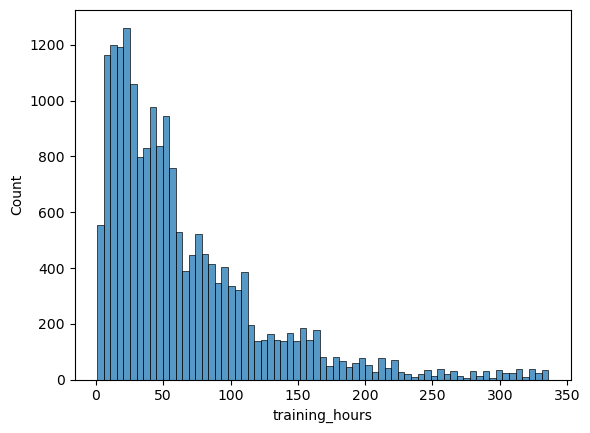

In [16]:
sns.histplot(df['training_hours']);

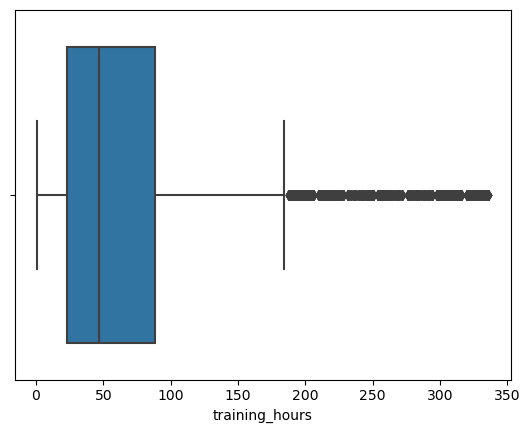

In [17]:
sns.boxplot(data=df, x='training_hours'); 

No outliers on lower range only upper. Will handle them by changing them to the upper bound.

In [18]:
#Cap with Q3 + IQR
Q1 =  df['training_hours'].quantile(0.25)
Q3 =  df['training_hours'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)

print(upper_bound)

185.5


In [19]:
#Changing any outliers greater than the upper bound to the upper bound
df.loc[df['training_hours'] > upper_bound, ['training_hours']] = upper_bound

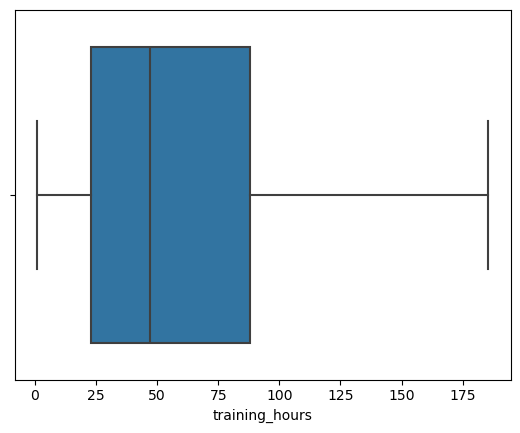

In [20]:
sns.boxplot(data=df, x='training_hours'); 

In [21]:
df.training_hours.describe()

count    19109.000000
mean        62.243916
std         50.237913
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        185.500000
Name: training_hours, dtype: float64

<b>Observations:<b>
- Mean went down by 3
- Standard deviation went down by 10

#### city_development_index

In [22]:
df.city_development_index.describe()

count    19109.000000
mean         0.828697
std          0.123401
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

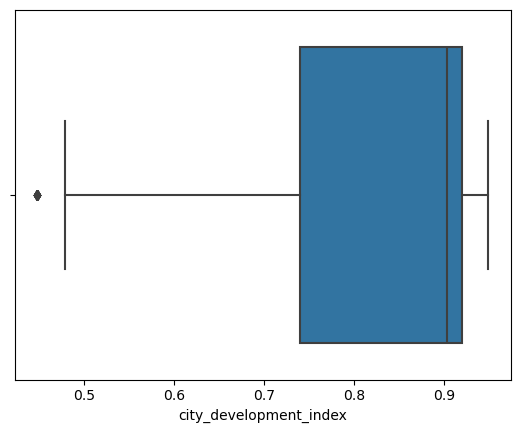

In [23]:
sns.boxplot(data=df, x='city_development_index'); 

One outlier on lower end

In [24]:
#Cap with Q1 - IQR
Q1 =  df['city_development_index'].quantile(0.25)
Q3 =  df['city_development_index'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)

print(lower_bound)

0.4699999999999999


In [25]:
#Changing outlier to lower bound
df.loc[df['city_development_index'] < lower_bound, ['city_development_index']] = lower_bound

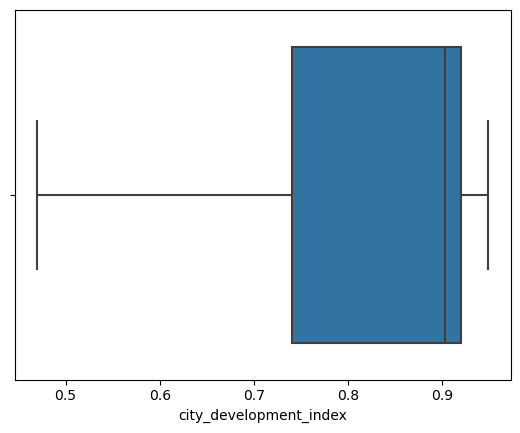

In [26]:
sns.boxplot(data=df, x='city_development_index'); 

In [27]:
df.city_development_index.describe()

count    19109.000000
mean         0.828717
std          0.123342
min          0.470000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

### Handling Missing Values

#### Gender

In [28]:
# Number of missing values in each row
df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2809
experience                  65
company_size              5920
company_type              6122
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [29]:
df.gender.value_counts()

gender
Male      13173
Female     1237
Other       191
Name: count, dtype: int64

In [30]:
# Setting null values to unkown
df.loc[df.gender.isnull(), 'gender'] = 'Unknown'

In [31]:
df[df['gender'] == 'Unknown']

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,city_21,0.624,Unknown,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0.0
3,city_115,0.789,Unknown,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52.0,1.0
5,city_176,0.764,Unknown,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24.0,1.0
9,city_103,0.920,Unknown,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123.0,0.0
10,city_21,0.624,Unknown,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,city_103,0.920,Unknown,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,never,15.0,0.0
19144,city_21,0.624,Unknown,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48.0,1.0
19145,city_44,0.725,Unknown,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,185.5,0.0
19148,city_21,0.624,Unknown,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40.0,1.0


Assuming the company is in a field of mostly males as seen by the value counts I will change both other and unkown to male. Looked for information to see if the mode of major discipline is different for each gender. Did not find any useful info.

In [32]:
#Changing Unkown to male
df.loc[df['gender'] == 'Unknown', ['gender']] = 'Male'

In [33]:
#Changing Other to male
df.loc[df['gender'] == 'Other', ['gender']] = 'Male'

In [34]:
df.gender.value_counts()

gender
Male      17872
Female     1237
Name: count, dtype: int64

In [35]:
df.gender.isna().sum()

0

#### enrolled_university

In [36]:
#Checking for total missing values in enrolled_university
df.enrolled_university.isna().sum()

386

In [37]:
df.enrolled_university.value_counts()

enrolled_university
no_enrollment       13772
Full time course     3753
Part time course     1198
Name: count, dtype: int64

In [38]:
# imputing all null values as no_enrollment as it is the mode
df.loc[df.enrolled_university.isnull(), 'enrolled_university'] = 'no_enrollment'

In [39]:
df.enrolled_university.isna().sum()

0

In [40]:
df.enrolled_university.value_counts()

enrolled_university
no_enrollment       14158
Full time course     3753
Part time course     1198
Name: count, dtype: int64

#### education_level

In [41]:
#Checking for total missing values in education_level
df.education_level.isna().sum()

460

In [42]:
df.education_level.value_counts()

education_level
Graduate          11556
Masters            4358
High School        2013
Phd                 414
Primary School      308
Name: count, dtype: int64

In [43]:
#imputing all null values as Graduate as it is the mode
df.loc[df.education_level.isnull(), 'education_level'] = 'Graduate'

In [44]:
#Checking for total missing values in education_level
df.education_level.isna().sum()

0

In [45]:
df.education_level.value_counts()

education_level
Graduate          12016
Masters            4358
High School        2013
Phd                 414
Primary School      308
Name: count, dtype: int64

#### major_discipline

In [46]:
#Checking for total missing values in major_discipline
df.major_discipline.isna().sum()

2809

In [47]:
df.major_discipline.value_counts()

major_discipline
STEM               14447
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [48]:
df[df['major_discipline'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24.0,0.0
10,city_21,0.624,Male,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32.0,1.0
13,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,NaN,2,NaN,NaN,never,24.0,0.0
14,city_21,0.624,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,never,26.0,0.0
25,city_67,0.855,Male,No relevent experience,no_enrollment,High School,NaN,4,NaN,NaN,never,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,never,15.0,0.0
19142,city_40,0.776,Male,Has relevent experience,no_enrollment,Graduate,NaN,5,10/49,Early Stage Startup,1,26.0,0.0
19151,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60.0,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97.0,0.0


In [49]:
#setting major_discipline values to Unkown
df.loc[df.major_discipline.isnull(), 'major_discipline'] = 'Unknown'

In [50]:
#imputing all values with highschool as their education_level as No major for major_discipline
df.loc[(df['major_discipline'] == 'Unknown') & (df['education_level'] == 'High School'), ['major_discipline']] = 'No Major'

In [51]:
#Seems as if the company we are hiring for is a STEM company so I will impute with that as the mode
df.loc[df['major_discipline'] == 'Unknown', 'major_discipline'] = 'STEM'

In [52]:
df.major_discipline.value_counts()

major_discipline
STEM               15243
No Major            2236
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: count, dtype: int64

In [53]:
df.major_discipline.isna().sum()

0

<b>Observations:<b>
- Stem went up by a few hundred
- No Major increased by roughly 2000

#### experience

In [54]:
#Checking for total missing values in experience
df.experience.isna().sum()

65

In [55]:
df.experience.value_counts()

experience
>20    3253
5      1428
4      1401
3      1353
6      1214
2      1125
7      1027
10      985
9       979
8       802
15      683
11      664
14      586
1       549
<1      521
16      507
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [56]:
df[df['experience'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
135,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,NaN,NaN,NaN,NaN,70.0,0.0
391,city_90,0.698,Male,Has relevent experience,Full time course,Masters,STEM,NaN,NaN,NaN,NaN,44.0,1.0
1589,city_134,0.698,Male,No relevent experience,no_enrollment,Graduate,STEM,NaN,NaN,NaN,never,33.0,0.0
2727,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,NaN,NaN,NaN,NaN,70.0,0.0
2859,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,NaN,10/49,NaN,1,41.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,NaN,5000-9999,NaN,1,13.0,1.0
18055,city_150,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,10/49,NaN,1,51.0,1.0
18143,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,10/49,NaN,NaN,182.0,1.0
18790,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,50-99,NGO,1,138.0,0.0


In [57]:
#setting experience null values to Unkown
df.loc[df.experience.isnull(), 'experience'] = 'Unknown'

In [58]:
#imputing values with no relevevant experience as <1
df.loc[(df['experience'] == 'Unknown') & (df['relevent_experience'] == 'No relevent experience'), ['experience']] = '<1'

In [59]:
#imputing values with relevant experience as >20 as its the mode
df.loc[(df['experience'] == 'Unknown') & (df['relevent_experience'] == 'Has relevent experience'), ['experience']] = '>20'

In [60]:
df.experience.isna().sum()

0

In [61]:
df.experience.value_counts()

experience
>20    3297
5      1428
4      1401
3      1353
6      1214
2      1125
7      1027
10      985
9       979
8       802
15      683
11      664
14      586
1       549
<1      542
16      507
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

#### company_size

In [62]:
#Checking for null values in company_size
df.company_size.isna().sum()

5920

In [63]:
df.company_size.value_counts()

company_size
50-99        3080
100-500      2561
10000+       2009
10/49        1470
1000-4999    1322
<10          1308
500-999       877
5000-9999     562
Name: count, dtype: int64

In [64]:
df[df['company_size'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52.0,1.0
5,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24.0,1.0
10,city_21,0.624,Male,No relevent experience,Full time course,High School,No Major,2,NaN,NaN,never,32.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19145,city_44,0.725,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,185.5,0.0
19151,city_149,0.689,Male,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,1,60.0,0.0
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42.0,1.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52.0,1.0


In [65]:
#changing values with last_new_job = never to company size = 0
df.loc[(df['last_new_job'] == 'never') & (df.company_size.isnull()), ['company_size']] = '0'

In [66]:
df.company_size.value_counts()

company_size
50-99        3080
100-500      2561
10000+       2009
0            1778
10/49        1470
1000-4999    1322
<10          1308
500-999       877
5000-9999     562
Name: count, dtype: int64

In [67]:
#changing rest of null values to 50-99 as it is the mode
df.loc[df.company_size.isnull(), 'company_size'] = '50-99'

In [68]:
df.company_size.value_counts()

company_size
50-99        7222
100-500      2561
10000+       2009
0            1778
10/49        1470
1000-4999    1322
<10          1308
500-999       877
5000-9999     562
Name: count, dtype: int64

In [69]:
#Checking for null values in company_size
df.company_size.isna().sum()

0

#### company_type

In [70]:
df.company_type.isna().sum()

6122

In [71]:
df.company_type.value_counts()

company_type
Pvt Ltd                9788
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

In [72]:
#setting all null values to Pvt Ltd as it is the mode by a significant margin
df.loc[df.company_type.isnull(), 'company_type'] = 'Pvt Ltd'

In [73]:
df.company_type.isna().sum()

0

In [74]:
df.company_type.value_counts()

company_type
Pvt Ltd                15910
Funded Startup          1001
Public Sector            953
Early Stage Startup      603
NGO                      521
Other                    121
Name: count, dtype: int64

#### last_new_job

In [75]:
df.last_new_job.isna().sum()

423

In [76]:
df.last_new_job.value_counts()

last_new_job
1        8027
>4       3268
2        2893
never    2447
4        1029
3        1022
Name: count, dtype: int64

In [77]:
df[df['last_new_job'].isnull()]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
58,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2,10/49,Funded Startup,NaN,32.0,1.0
64,city_11,0.550,Male,No relevent experience,Full time course,High School,No Major,3,50-99,Pvt Ltd,NaN,98.0,0.0
90,city_61,0.913,Male,No relevent experience,Full time course,Graduate,STEM,4,50-99,Pvt Ltd,NaN,140.0,0.0
135,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,<1,50-99,Pvt Ltd,NaN,70.0,0.0
180,city_94,0.698,Male,No relevent experience,Full time course,Graduate,STEM,5,5000-9999,Pvt Ltd,NaN,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18944,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,NaN,27.0,0.0
19043,city_114,0.926,Male,No relevent experience,Full time course,High School,No Major,3,50-99,Pvt Ltd,NaN,20.0,0.0
19106,city_100,0.887,Male,No relevent experience,Full time course,Masters,STEM,6,100-500,Public Sector,NaN,8.0,0.0
19113,city_19,0.682,Male,No relevent experience,Full time course,Graduate,STEM,6,50-99,Pvt Ltd,NaN,53.0,0.0


In [78]:
#setting all null values to the mode of 1
df.loc[df.last_new_job.isnull(), 'last_new_job'] = '1'

In [79]:
df.last_new_job.isna().sum()

0

In [80]:
df.last_new_job.value_counts()

last_new_job
1        8450
>4       3268
2        2893
never    2447
4        1029
3        1022
Name: count, dtype: int64

In [81]:
df.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

<b> NO MORE NULL VALUES!! <b>

### Handling Inconsistent Data Types

In [82]:
cols = ['city', 'gender', 'relevent_experience', 'enrolled_university',
        'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'target']

for col in cols:
    print(f'{df[col].value_counts()} \n')

city
city_103    4318
city_21     2697
city_16     1530
city_114    1336
city_160     842
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64 

gender
Male      17872
Female     1237
Name: count, dtype: int64 

relevent_experience
Has relevent experience    13749
No relevent experience      5360
Name: count, dtype: int64 

enrolled_university
no_enrollment       14158
Full time course     3753
Part time course     1198
Name: count, dtype: int64 

education_level
Graduate          12016
Masters            4358
High School        2013
Phd                 414
Primary School      308
Name: count, dtype: int64 

major_discipline
STEM               15243
No Major            2236
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: count, dtype: int64 

experience
>20    3297
5      1428
4      1401
3      1353
6      1214
2      1125
7      1027
10    

city, gender, relevant experience, enrolled university, education level, major_discipline, company_type, and target all look fine.

#### experience

In [83]:
#changing all values in experience that are <1 to 0 
df.loc[df['experience'] == '<1', 'experience'] = '0'

In [84]:
df.experience.value_counts()

experience
>20    3297
5      1428
4      1401
3      1353
6      1214
2      1125
7      1027
10      985
9       979
8       802
15      683
11      664
14      586
1       549
0       542
16      507
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

#### company_size

In [85]:
df.company_size.value_counts()

company_size
50-99        7222
100-500      2561
10000+       2009
0            1778
10/49        1470
1000-4999    1322
<10          1308
500-999       877
5000-9999     562
Name: count, dtype: int64

Value of 10/49 does not make sense. Going to change it to 10-49

In [86]:
#Changing 10/49 to 10-49 
df.loc[df['company_size'] == '10/49', 'company_size'] = '10-49'

In [87]:
df.company_size.value_counts()

company_size
50-99        7222
100-500      2561
10000+       2009
0            1778
10-49        1470
1000-4999    1322
<10          1308
500-999       877
5000-9999     562
Name: count, dtype: int64

#### last_new_job

In [88]:
df.last_new_job.value_counts()

last_new_job
1        8450
>4       3268
2        2893
never    2447
4        1029
3        1022
Name: count, dtype: int64

In [89]:
#changing never to 0
df.loc[df['last_new_job'] == 'never', 'last_new_job'] = '0'

In [90]:
df.last_new_job.value_counts()

last_new_job
1     8450
>4    3268
2     2893
0     2447
4     1029
3     1022
Name: count, dtype: int64

## Exploratory Data Analysis

#### Functions

In [1]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    data[feature].describe()
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [92]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [93]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [94]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Numeric Features

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,19109.0,0.828717,0.123342,0.47,0.74,0.903,0.92,0.949
training_hours,19109.0,62.243916,50.237913,1.00,23.00,47.000,88.00,185.500
target,19109.0,0.249359,0.432653,0.00,0.00,0.000,0.00,1.000


Numeric Features:
- city_development_index
- trainging_hours

#### city_development_index

In [96]:
df['city_development_index'].describe()

count    19109.000000
mean         0.828717
std          0.123342
min          0.470000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

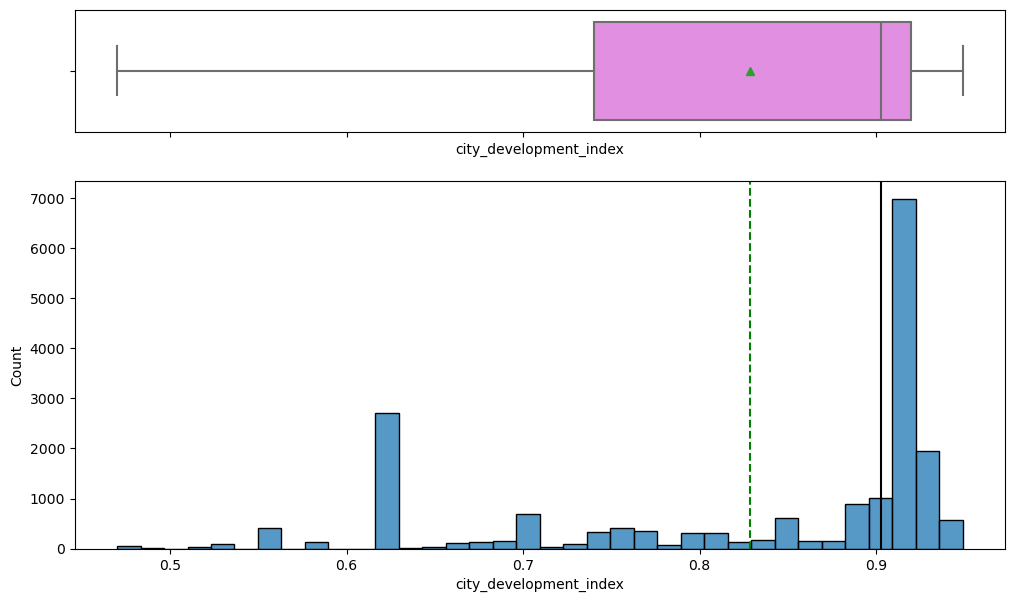

In [97]:
histogram_boxplot(df, 'city_development_index');

In [98]:
df['city_development_index'].mode()

0    0.92
Name: city_development_index, dtype: float64

Observations:
- rather irreegular distribution
- mode is .92
- range .47-.949
- mean .828

#### training_hours

In [99]:
df['training_hours'].describe()

count    19109.000000
mean        62.243916
std         50.237913
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        185.500000
Name: training_hours, dtype: float64

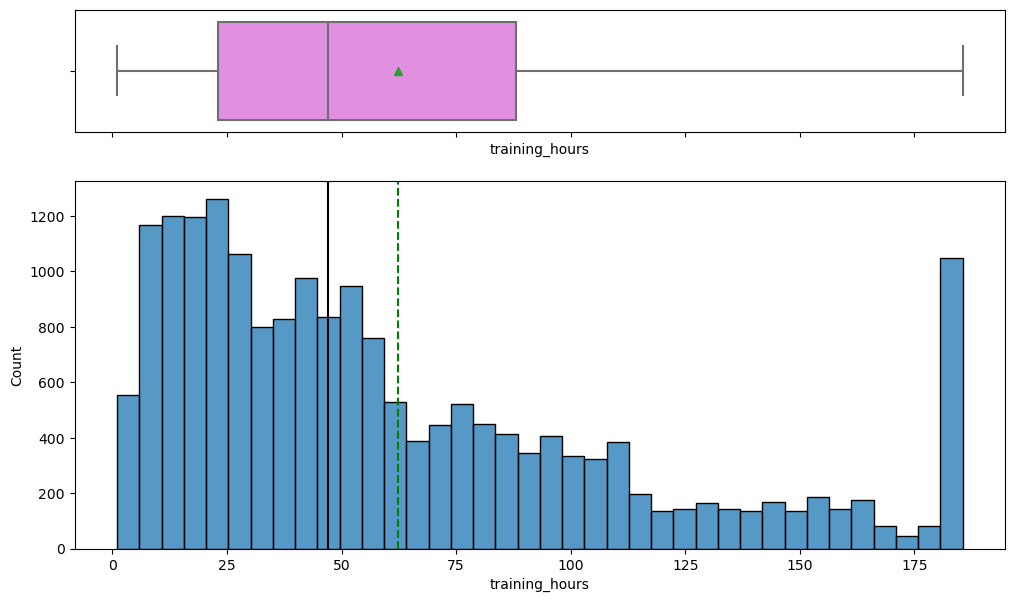

In [100]:
histogram_boxplot(df, 'training_hours');

In [101]:
df['training_hours'].mode()

0    185.5
Name: training_hours, dtype: float64

Observations:
- right skewed graph except for on the end likely due to changing values to the upper bound
- mean 62.2
- mode 185.5 likley due to imputing does not reflect on the graph
- range 1-185.5


#### Categorical Features

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19109 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19109 non-null  object 
 1   city_development_index  19109 non-null  float64
 2   gender                  19109 non-null  object 
 3   relevent_experience     19109 non-null  object 
 4   enrolled_university     19109 non-null  object 
 5   education_level         19109 non-null  object 
 6   major_discipline        19109 non-null  object 
 7   experience              19109 non-null  object 
 8   company_size            19109 non-null  object 
 9   company_type            19109 non-null  object 
 10  last_new_job            19109 non-null  object 
 11  training_hours          19109 non-null  float64
 12  target                  19109 non-null  float64
dtypes: float64(3), object(10)
memory usage: 2.0+ MB


Categorical features:
- city
- gender
- relevent_experience
- enrolled_university
- education_level
- major_discipline
- experience
- company_size
- company_type
- last_new_job
- target

#### city

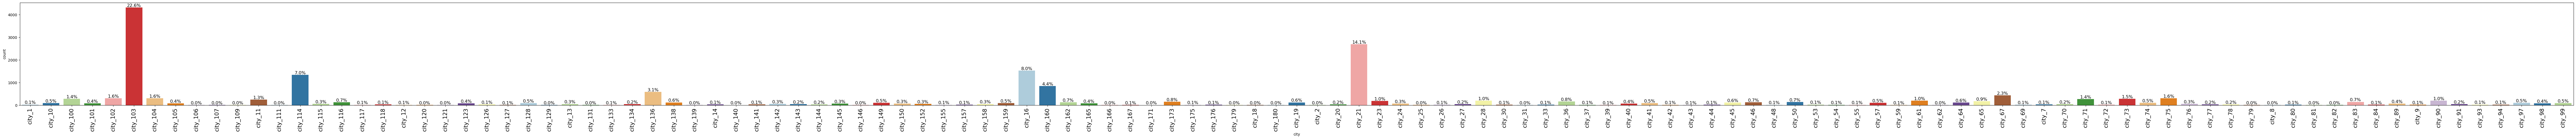

In [103]:
labeled_barplot(df, 'city', perc=True)

In [104]:
df.city.value_counts()

city
city_103    4318
city_21     2697
city_16     1530
city_114    1336
city_160     842
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

Observations:
- City_103 has the majority
- City_140 and City_171 have 1
- seems as if after city_160 the totals drop off for each location

#### gender

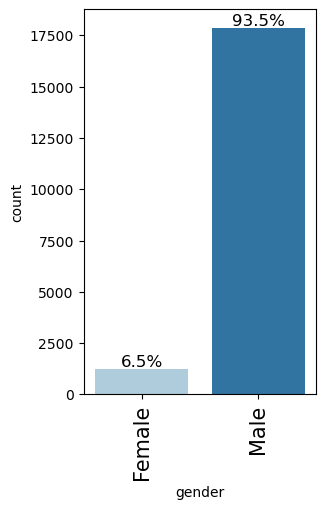

In [105]:
labeled_barplot(df, 'gender', perc=True)

Observations:
- Male is has much more values making up 93.5%
- Field seems to be male dominated

#### relevant_experience

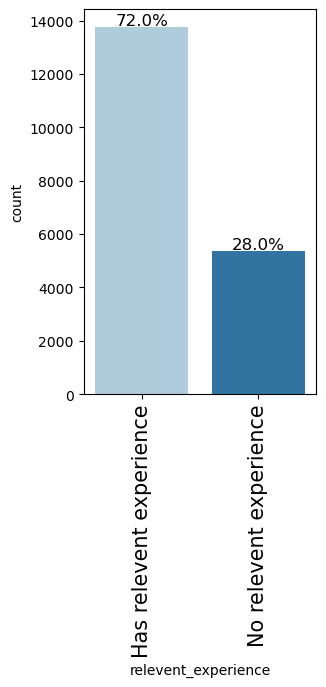

In [106]:
labeled_barplot(df, 'relevent_experience', perc=True)

Observations:
- Majority of people have relevant experience making up 72% of the data set

#### enrolled_university

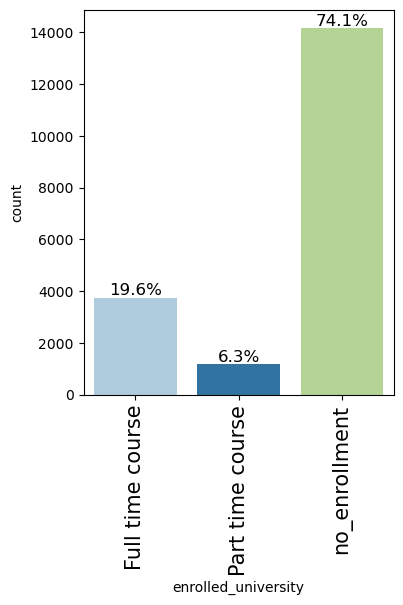

In [107]:
labeled_barplot(df, 'enrolled_university', perc=True)

Observations:
- 74.1% have no enrollment
- 20% are in a full time course
- 6.3% are in a part time course

#### education_level

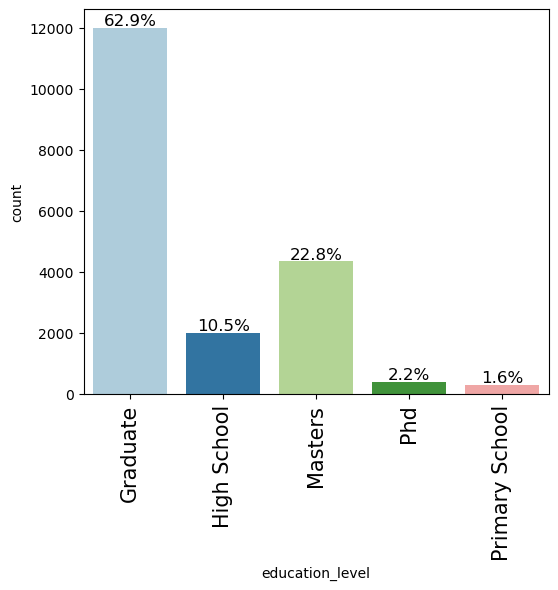

In [108]:
labeled_barplot(df, 'education_level', perc=True)

Observations:
- Majority of people are graduates im assuming this means bachelors
- least amount of people have PHD and Primary school

#### major_discipline

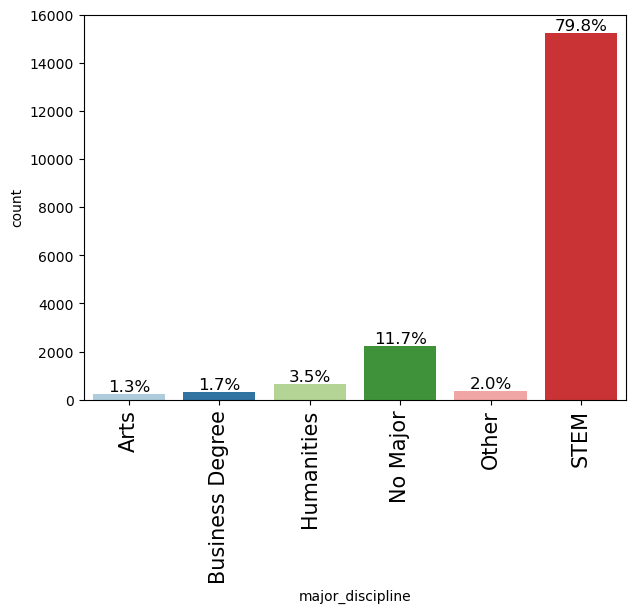

In [109]:
labeled_barplot(df, 'major_discipline', perc=True)

Observations
- Roughly 80% are STEM majors
- 11.7% have no major

#### experience

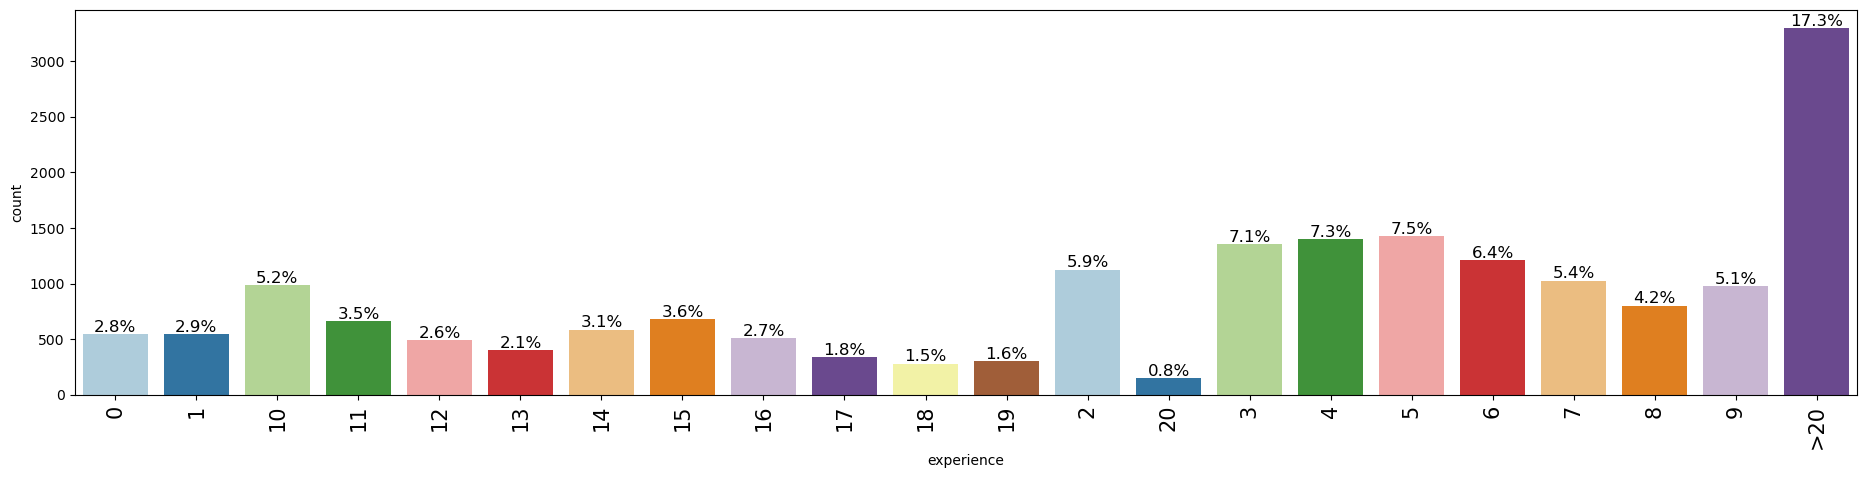

In [110]:
labeled_barplot(df, 'experience', perc=True)

Observations:
- Varying distribution, seems to possibly be numeric or categorical
- 17.3% have greater than 20 years
- The rest are between 7.5% and .08%

#### company_size

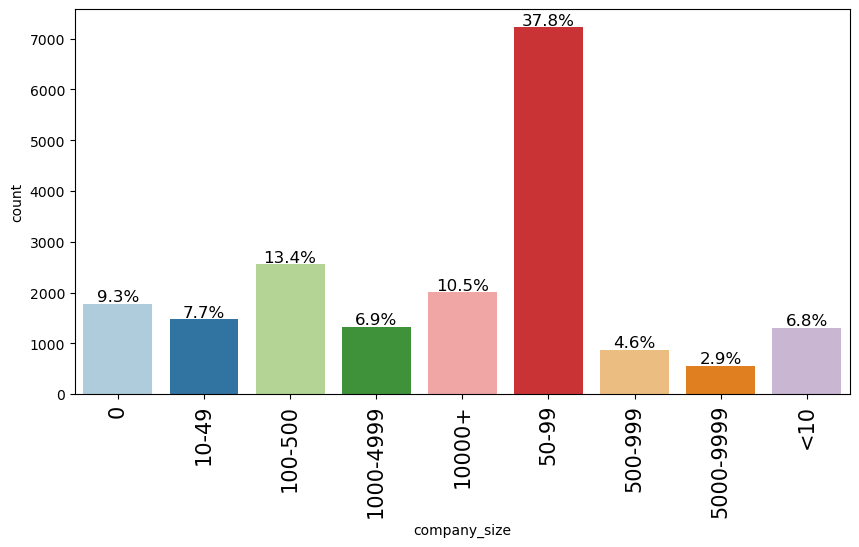

In [111]:
labeled_barplot(df, 'company_size', perc=True)

Observations:
- 37.8% have a company size of 50-99
- 0 means no company
- 13.4% are between 100-500

#### company_type

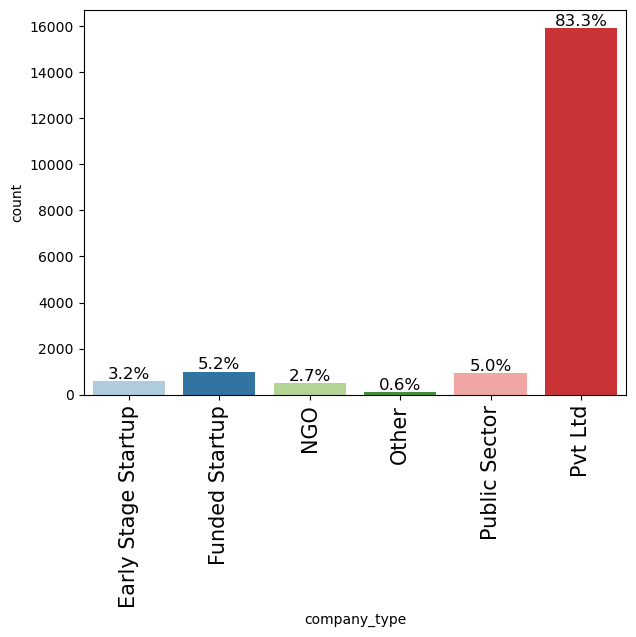

In [112]:
labeled_barplot(df, 'company_type', perc=True)

Observations:
- 83.3% of entries are Pvt Ltd
- rest of values are make up between 5.2% and .6%

#### last_new_job

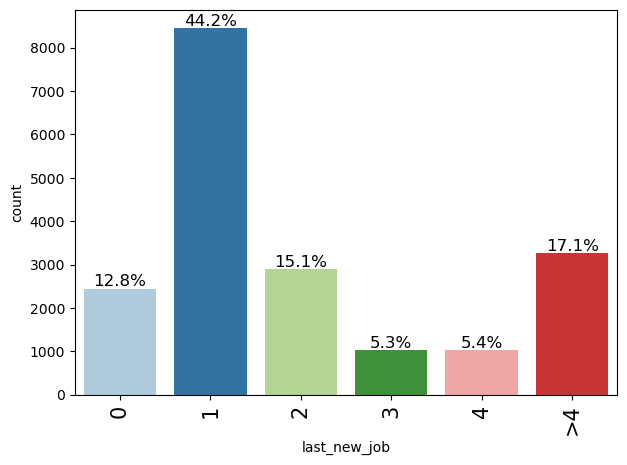

In [113]:
labeled_barplot(df, 'last_new_job', perc=True)

Observations:
- 44.2% of peoples new job was 1 year ago
- Next highest is greater than 4 at 17.1%

#### target

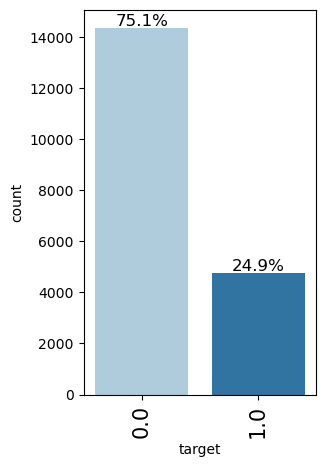

In [114]:
labeled_barplot(df, 'target', perc=True)

Observations:
- 75.1% of people are not looking for a new job
- 24.0% of people are looking for a new job

### Multivariate Analysis


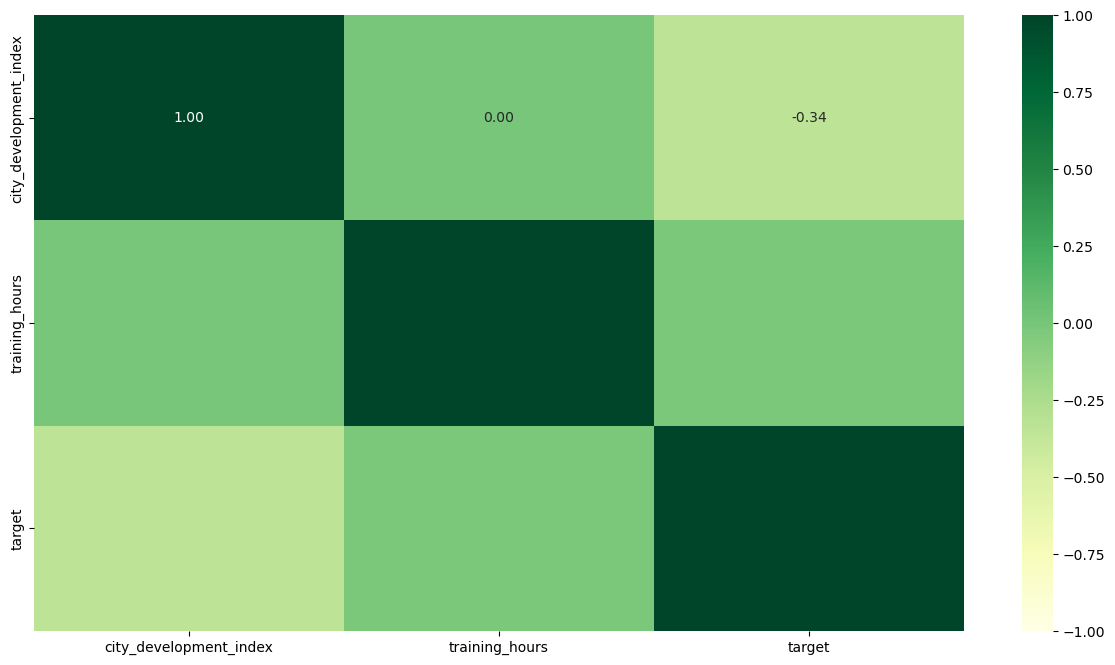

In [115]:
# Correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGn")
plt.show()

<b>Observations:<b>
- slighlthy negative correlation between city_development_index and the target variable

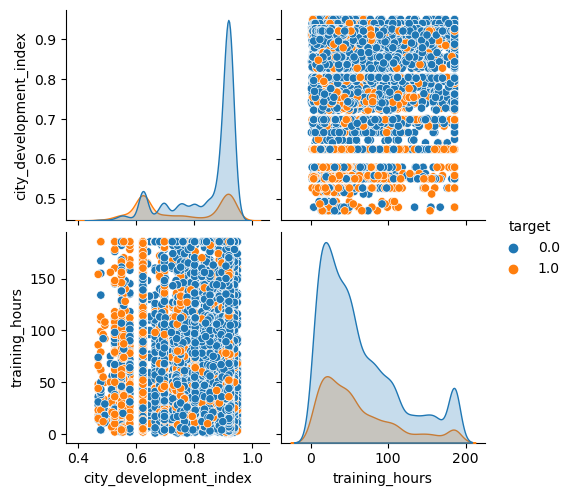

In [116]:
# Numeric variables based on target
sns.pairplot(data=df,hue='target')

#### Numeric Features

#### city_development_index x target

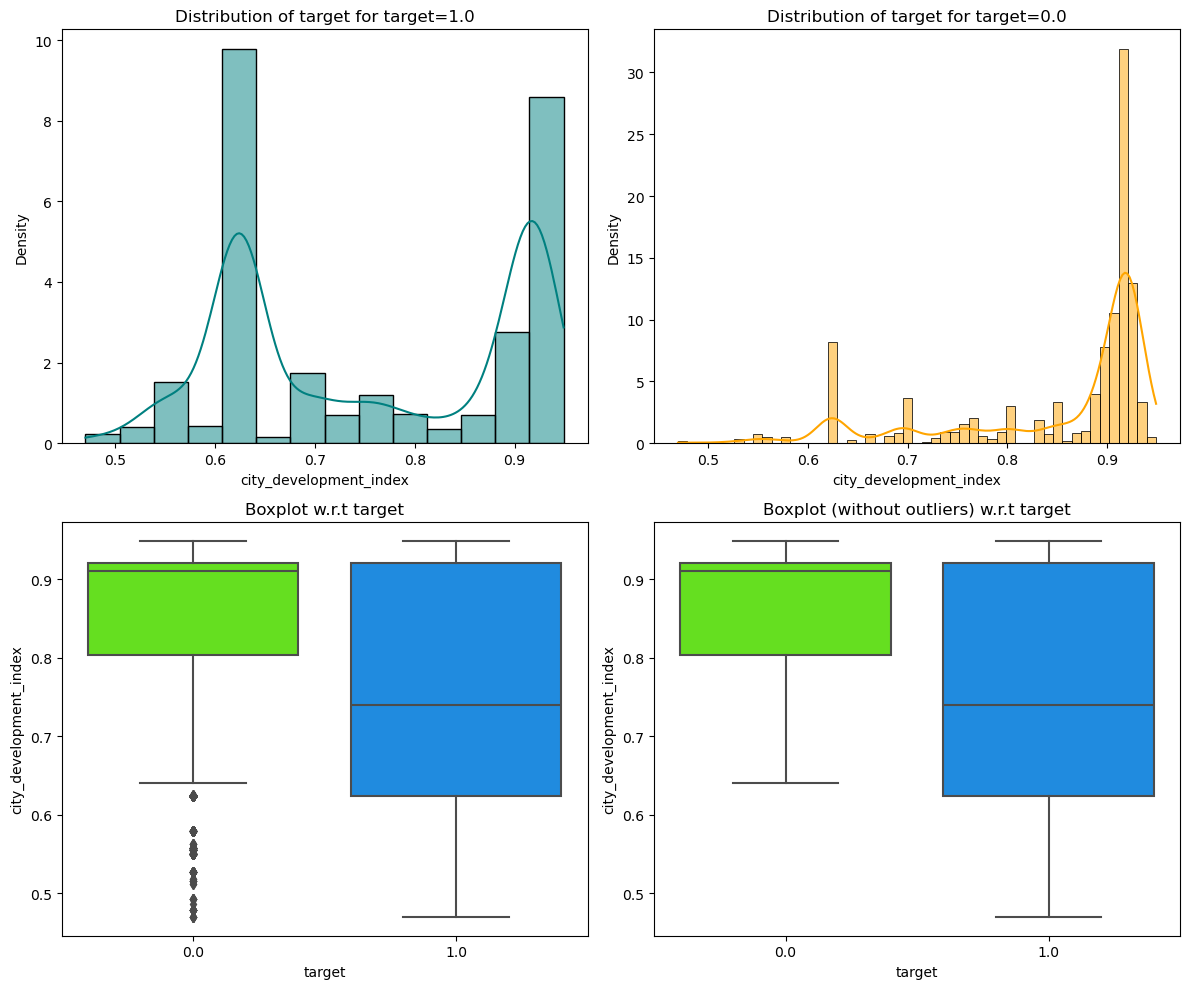

In [117]:
distribution_plot_wrt_target(df, 'city_development_index', 'target')

<b>Observations<b>
- Much smaller iqr for those who arent looking for a job likely due to amount of entries
- median is much higher for those who arent looking for a job
- left skewed graphs for those who arent looking for a job
- large density for .6 in both those who are and arent looking for a job

#### training_hours x target

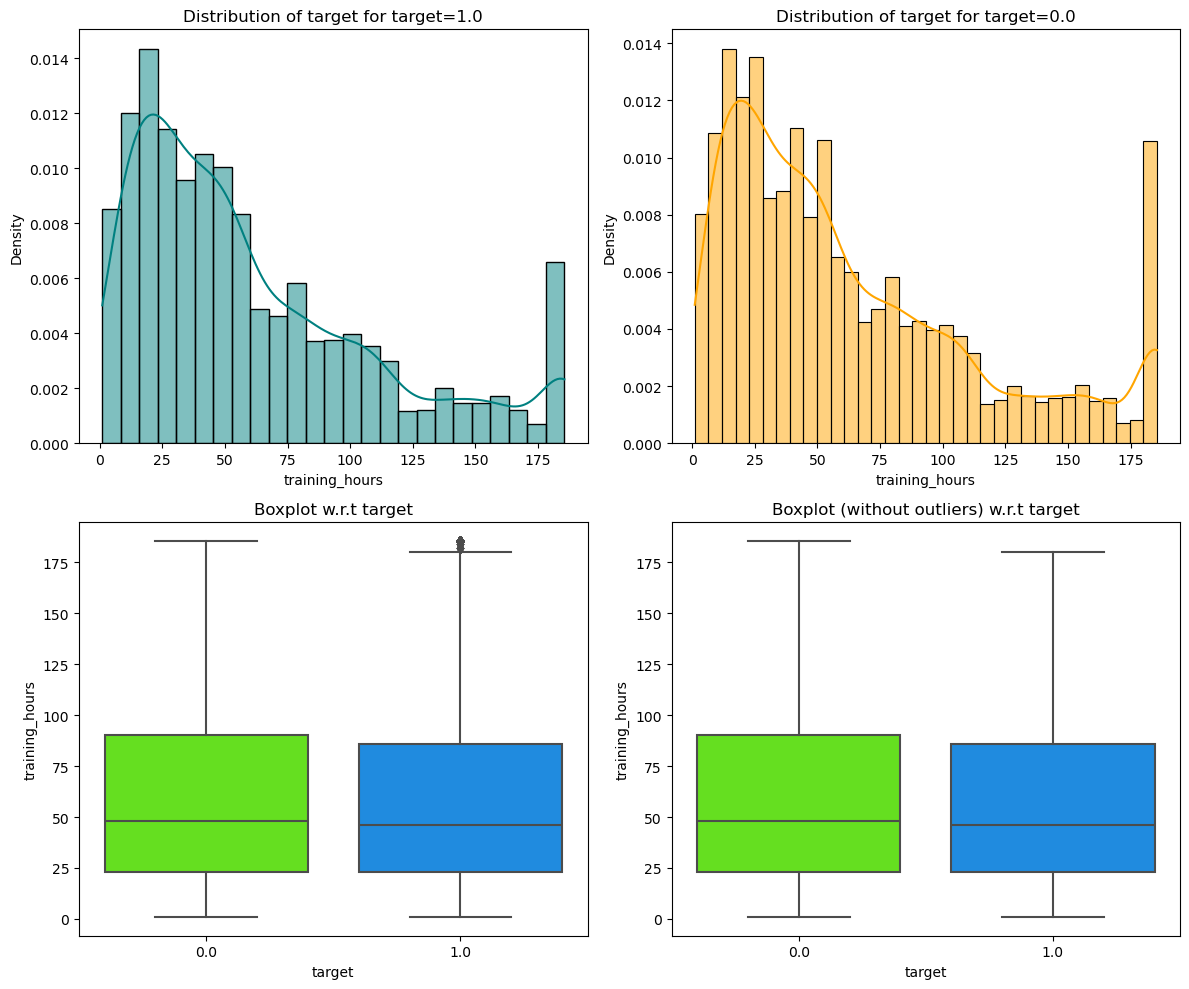

In [118]:
distribution_plot_wrt_target(df, 'training_hours', 'target')

<b>Observations<b>
- Similar distributions for both 0 and 1
- graphs and boxplots are both similar to one another

#### Categorical Features

#### city x target

target      0.0   1.0    All
city                        
All       14344  4765  19109
city_21    1105  1592   2697
city_103   3395   923   4318
city_160    645   197    842
city_16    1351   179   1530
...         ...   ...    ...
city_129      3     0      3
city_8        4     0      4
city_39      11     0     11
city_111      3     0      3
city_2        7     0      7

[124 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


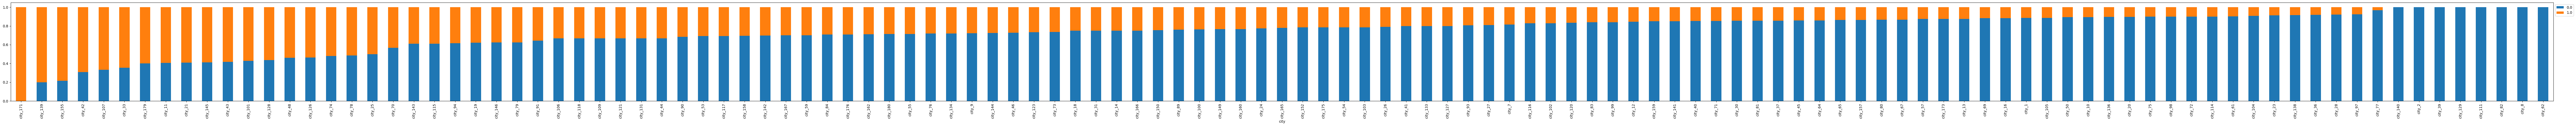

In [119]:
stacked_barplot(df, 'city', 'target')

Observations:
- city_171 has only people looking for a new job
- not much insight can be gained due to the amount of variables
- possibly some binning variables with similar distributions

#### gender x target

target    0.0   1.0    All
gender                    
All     14344  4765  19109
Male    13433  4439  17872
Female    911   326   1237
------------------------------------------------------------------------------------------------------------------------


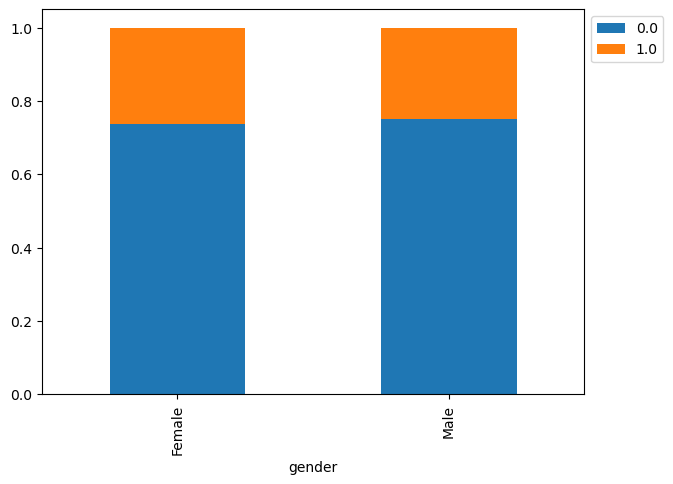

In [120]:
stacked_barplot(df, 'gender', 'target')

<b>Observations<b>
- similar distribution for both females and males

#### relevent_experience x target

target                     0.0   1.0    All
relevent_experience                        
All                      14344  4765  19109
Has relevent experience  10796  2953  13749
No relevent experience    3548  1812   5360
------------------------------------------------------------------------------------------------------------------------


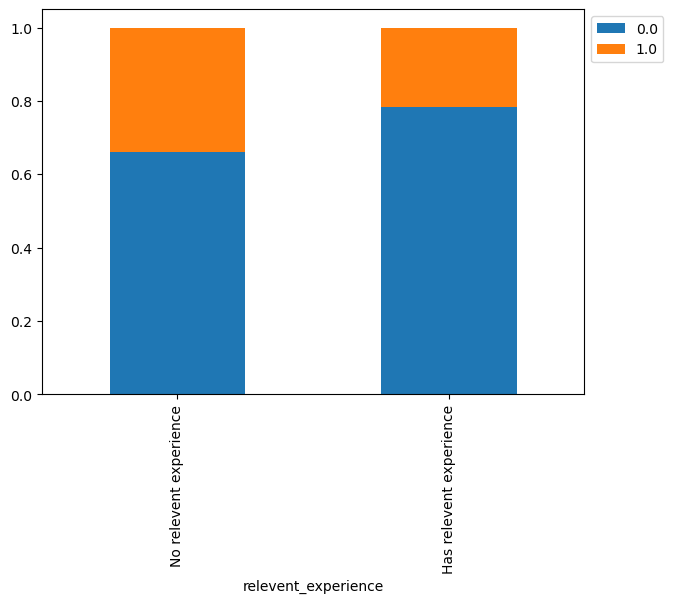

In [121]:
stacked_barplot(df, 'relevent_experience', 'target')

<b>Observations:<b>
- People who have no relevant experience have a slighlty higher percentage of people looking for jobs

#### enrolled_university x target

target                 0.0   1.0    All
enrolled_university                    
All                  14344  4765  19109
no_enrollment        11122  3036  14158
Full time course      2326  1427   3753
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


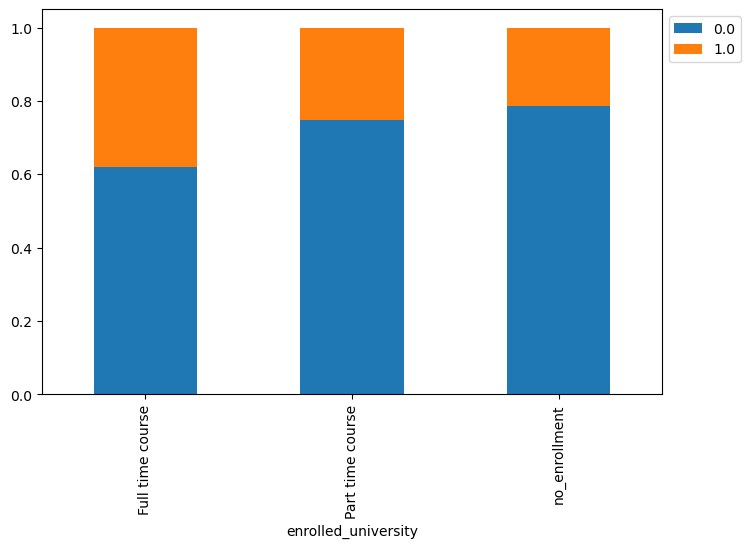

In [122]:
stacked_barplot(df, 'enrolled_university', 'target')

<b>Observations:<b>
- People in a full time course have a higher percentage distribution than the others
- Part time course and no enrollment have similar distributions

#### education_level x target

target             0.0   1.0    All
education_level                    
All              14344  4765  19109
Graduate          8678  3338  12016
Masters           3423   935   4358
High School       1620   393   2013
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


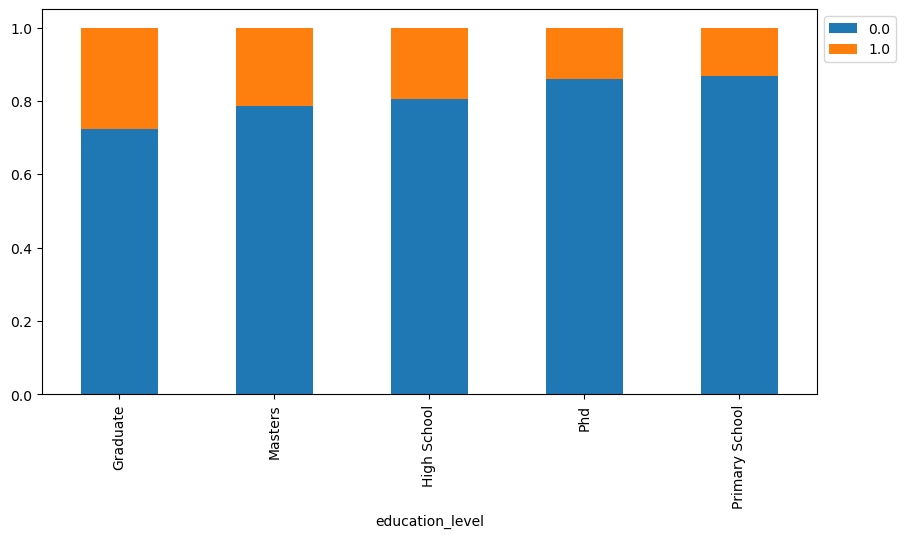

In [123]:
stacked_barplot(df, 'education_level', 'target')

<b>Observations:<b>
- Graduate has the highest distribution of those looking for jobs
- Masters and high school are the next highest and similar
- The lowest distribution looking for a new job are those with a Phd and those in primary school

#### major_discipline x target

target              0.0   1.0    All
major_discipline                    
All               14344  4765  19109
STEM              11308  3935  15243
No Major           1788   448   2236
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


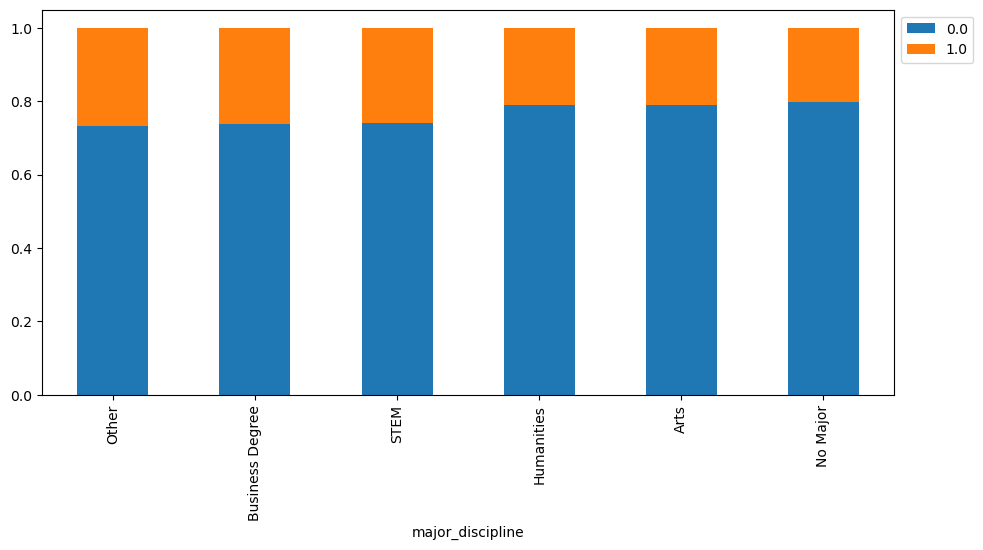

In [124]:
stacked_barplot(df, 'major_discipline', 'target')

<b>Observations:<b>
- Other, Business, and stem have the highest distributions and are similar
- Humanities, Arts, and no major have a slightly lower distribution and are similar

#### experience x target

target        0.0   1.0    All
experience                    
All         14344  4765  19109
>20          2783   514   3297
3             875   478   1353
4             945   456   1401
5            1017   411   1428
2             753   372   1125
6             872   342   1214
7             725   302   1027
0             299   243    542
1             316   233    549
9             766   213    979
10            778   207    985
8             607   195    802
11            513   151    664
15            569   114    683
14            479   107    586
12            402    92    494
13            322    77    399
16            435    72    507
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


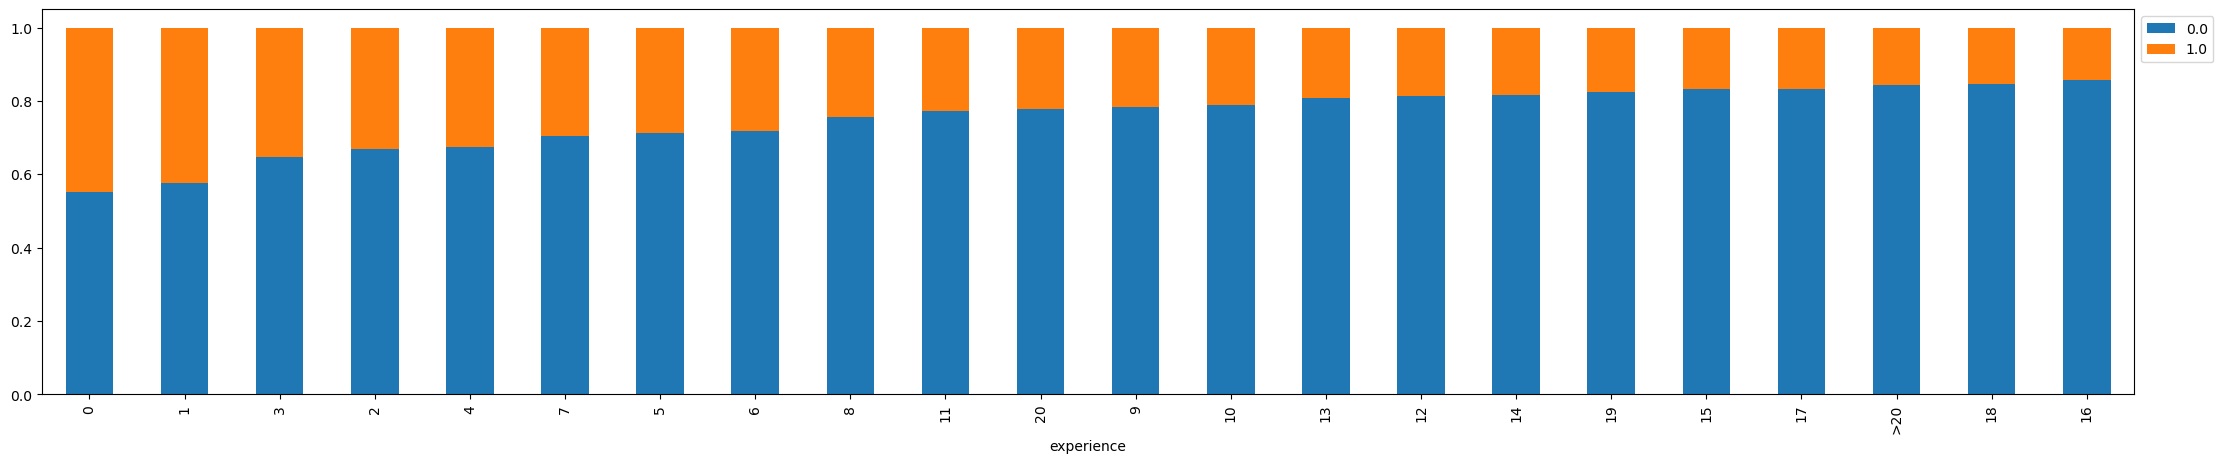

In [125]:
stacked_barplot(df, 'experience', 'target')

<b>Observations:<b>
- 0-4 have the highest distribution of those looking for a job. Makes sense as they are looking to gain more experience
- The higher the years of experience the less likely they are looking for a job

#### company_size x target

target          0.0   1.0    All
company_size                    
All           14344  4765  19109
50-99          4857  2365   7222
0              1197   581   1778
100-500        2148   413   2561
10000+         1625   384   2009
10-49          1126   344   1470
<10            1084   224   1308
1000-4999      1122   200   1322
500-999         725   152    877
5000-9999       460   102    562
------------------------------------------------------------------------------------------------------------------------


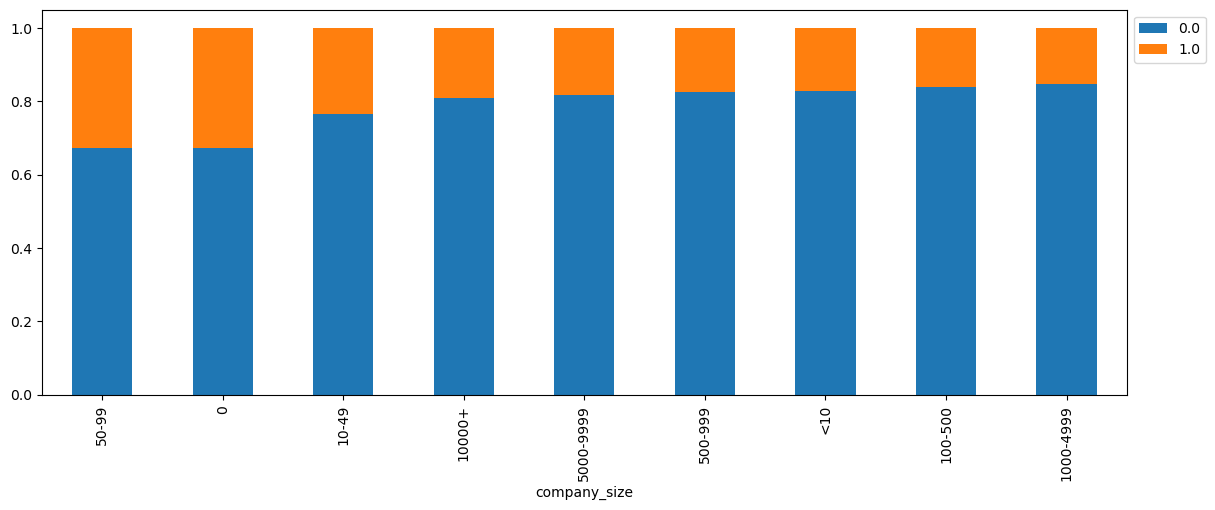

In [126]:
stacked_barplot(df, 'company_size', 'target')

<b>Observations:<b>
- Those in a company of 50-99 people or no job are most likely to be looking for a job
- The people least likley to look for a job are those in a company of 1000-4999

#### company_type x target

target                 0.0   1.0    All
company_type                           
All                  14344  4765  19109
Pvt Ltd              11763  4147  15910
Public Sector          743   210    953
Early Stage Startup    461   142    603
Funded Startup         861   140   1001
NGO                    424    97    521
Other                   92    29    121
------------------------------------------------------------------------------------------------------------------------


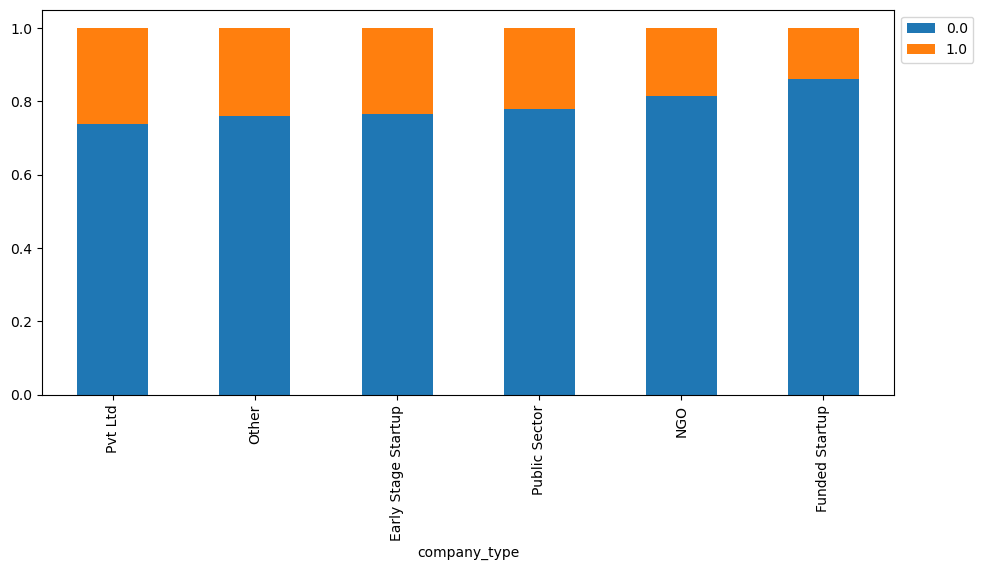

In [127]:
stacked_barplot(df, 'company_type', 'target')

<b>Observations:<b>
- PVt Ltd, other, Early stage startup, and public sector all have similar distributions and the highest amount of people who are loooking for a new job
- funded startups are the least likely to be looking for a new job

#### last_new_job x target

target          0.0   1.0    All
last_new_job                    
All           14344  4765  19109
1              6175  2275   8450
0              1711   736   2447
2              2194   699   2893
>4             2670   598   3268
3               793   229   1022
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


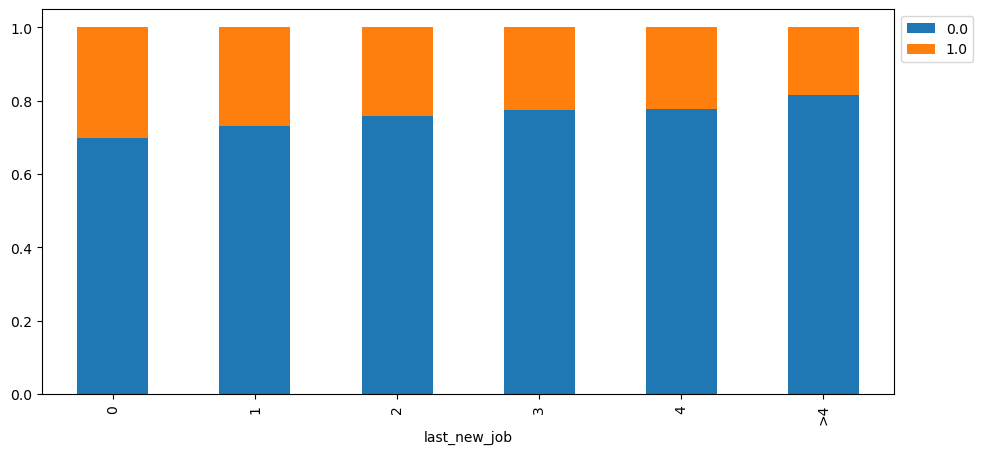

In [128]:
stacked_barplot(df, 'last_new_job', 'target')

<b>Observations:<b>
- The more years you have without a new job the less likely you are to be looking for a new job

### Pre Processing and EDA Summary/Observations:

- Deleted Employee ID column
- Deleted 49 duplicate rows
- Updated training hours outliers to the upper bound
- Updated city_develpment_index outliers to the lower bound
- Changed other and null values in gender to male as it is the mode
- Imputed null values for enrolled_universtity to no_enrollment as it is the mode
- Imputed null values for education_level to graduate the mode
- Imputed all missing values for major that had a education_level of highschool as no major
- Imputed the other missing values for major into STEM the mode
- Imputed null values in experience that had no relevent experience to <1
- Imputed all other null values in experience to the mode of >20
- Changed null values in company size that had no last_new_job to 0 as they dont have a job
- Imputed all other null values in company size to 50-99 as it is the mode
- Imputed all null values in company_type to Pvt Ltd the mode
- Imputed all null values in last new job to the mode of 1
- Changed the experience feature any values of <1 were changed to 0
- Changed 10/49 in company size to 10-49
- Changed last new job values of 'never' to zero
- City_103 has the most people
- The data set is largely male
- Most people have no relevent experience
- Most people are not enrolled
- Most people in data set are graduates
- Most people are STEM majors
- Most people work at Pvt Ltd's
- Most people are not looking for a new job
- Those in a full time course are more likely to be looking for a job than those in other enrollments
- Those with no relevent experience are more likely to be looking for a job then those who do 
- The higher the years of experience the less likely they are looking for a job
- The more years you have without a new job the less likely you are to be looking for a new job

## Feature Engineering

In [129]:
df.head(5)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36.0,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,0,Pvt Ltd,0,83.0,0.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,0,Pvt Ltd,0,52.0,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0.0


### City

In [130]:
df.city.value_counts()

city
city_103    4318
city_21     2697
city_16     1530
city_114    1336
city_160     842
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

In [131]:
# Label Encoding City
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])

In [132]:
df.city.value_counts()

city
5     4318
64    2697
48    1530
13    1336
49     842
      ... 
25       3
12       3
20       3
34       1
54       1
Name: count, Length: 123, dtype: int64

#### Thoughts/Other Options

- Thought about binning numbers with similar distributions

### City_development_index

In [133]:
df.city_development_index.describe()

count    19109.000000
mean         0.828717
std          0.123342
min          0.470000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [134]:
# Normalizing City_development_index
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['city_development_index']])
df[['city_development_index']] = scaler.transform(df[['city_development_index']])

In [135]:
df.city_development_index.describe()

count    19109.000000
mean         0.748887
std          0.257499
min          0.000000
25%          0.563674
50%          0.903967
75%          0.939457
max          1.000000
Name: city_development_index, dtype: float64

### Gender

In [136]:
df.gender.value_counts()

gender
Male      17872
Female     1237
Name: count, dtype: int64

In [137]:
# Using get_dummies to encode Gender
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [138]:
df.head(1)

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Male
0,5,0.939457,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36.0,1.0,True


#### Thoughts/Other Options
- Thought about label encoding

### relevent_experience

In [139]:
df.relevent_experience.value_counts()

relevent_experience
Has relevent experience    13749
No relevent experience      5360
Name: count, dtype: int64

In [140]:
# Using get_dummies to encode relevent_experience
df = pd.get_dummies(df, columns=['relevent_experience'], drop_first=True)

In [141]:
df.head(1)

,city,city_development_index,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Male,relevent_experience_No relevent experience
0,5,0.939457,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36.0,1.0,True,False


#### Thoughts/Other Options
- Thought about label encoding

### enrolled_university

In [142]:
df.enrolled_university.value_counts()

enrolled_university
no_enrollment       14158
Full time course     3753
Part time course     1198
Name: count, dtype: int64

In [143]:
# Label Encoding enrolled_university
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['enrolled_university'] = label_encoder.fit_transform(df['enrolled_university'])

In [144]:
df.enrolled_university.value_counts()

enrolled_university
2    14158
0     3753
1     1198
Name: count, dtype: int64

#### Thoughts/Other Options
- Possibly use get dummies to encode

### education_level

In [145]:
df.education_level.value_counts()

education_level
Graduate          12016
Masters            4358
High School        2013
Phd                 414
Primary School      308
Name: count, dtype: int64

In [146]:
# Label Encoding education_level
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['education_level'] = label_encoder.fit_transform(df['education_level'])

In [147]:
df.education_level.value_counts()

education_level
0    12016
2     4358
1     2013
3      414
4      308
Name: count, dtype: int64

#### Thoughts/Other Options
- Possibly could have binned values with similar distributions

### Major_discipline

In [148]:
df.major_discipline.value_counts()

major_discipline
STEM               15243
No Major            2236
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: count, dtype: int64

In [149]:
# Label Encoding major_discipline
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['major_discipline'] = label_encoder.fit_transform(df['major_discipline'])

In [150]:
df.major_discipline.value_counts()

major_discipline
5    15243
3     2236
2      669
4      381
1      327
0      253
Name: count, dtype: int64

#### Thoughts/Other Options
- Possibly could have binned values with similar distributions

### experience

In [151]:
df.experience.value_counts()

experience
>20    3297
5      1428
4      1401
3      1353
6      1214
2      1125
7      1027
10      985
9       979
8       802
15      683
11      664
14      586
1       549
0       542
16      507
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [152]:
#changing >20 to 21 to allow for binning
df.loc[df['experience'] == '>20', 'experience'] = '21'

In [153]:
df.experience.value_counts()

experience
21    3297
5     1428
4     1401
3     1353
6     1214
2     1125
7     1027
10     985
9      979
8      802
15     683
11     664
14     586
1      549
0      542
16     507
12     494
13     399
17     342
19     304
18     280
20     148
Name: count, dtype: int64

In [154]:
#Changed experience to float to be able to make bins
df['experience'] = df['experience'].astype('float')

In [155]:
#Created experience groups as the distributions are similar
df['experience_groups'] = pd.cut(df['experience'], bins=[0,4,9,14,21], labels=["0-4","5-9","10-14", "15-21"])

In [156]:
df.head(1)

,city,city_development_index,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Male,relevent_experience_No relevent experience,experience_groups
0,5,0.939457,2,0,5,21.0,50-99,Pvt Ltd,1,36.0,1.0,True,False,15-21


In [157]:
# Label Encoding experience
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['experience'] = label_encoder.fit_transform(df['experience'])

In [158]:
df.head(1)

,city,city_development_index,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Male,relevent_experience_No relevent experience,experience_groups
0,5,0.939457,2,0,5,21,50-99,Pvt Ltd,1,36.0,1.0,True,False,15-21


### company_size

In [159]:
df.company_size.value_counts()

company_size
50-99        7222
100-500      2561
10000+       2009
0            1778
10-49        1470
1000-4999    1322
<10          1308
500-999       877
5000-9999     562
Name: count, dtype: int64

In [160]:
# Label Encoding company_size
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['company_size'] = label_encoder.fit_transform(df['company_size'])

In [161]:
df.company_size.value_counts()

company_size
5    7222
2    2561
4    2009
0    1778
1    1470
3    1322
8    1308
6     877
7     562
Name: count, dtype: int64

### company_type

In [162]:
df.company_type.value_counts()

company_type
Pvt Ltd                15910
Funded Startup          1001
Public Sector            953
Early Stage Startup      603
NGO                      521
Other                    121
Name: count, dtype: int64

In [163]:
# Label Encoding company_type
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['company_type'] = label_encoder.fit_transform(df['company_type'])

In [164]:
df.company_type.value_counts()

company_type
5    15910
1     1001
4      953
0      603
2      521
3      121
Name: count, dtype: int64

### last_new_job

In [165]:
df.last_new_job.value_counts()

last_new_job
1     8450
>4    3268
2     2893
0     2447
4     1029
3     1022
Name: count, dtype: int64

In [166]:
# Label Encoding last_new_job
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['last_new_job'] = label_encoder.fit_transform(df['last_new_job'])

In [167]:
df.last_new_job.value_counts()

last_new_job
1    8450
5    3268
2    2893
0    2447
4    1029
3    1022
Name: count, dtype: int64

### training_hours

In [168]:
df.training_hours.value_counts()

training_hours
185.5    984
28.0     327
12.0     291
18.0     289
22.0     279
        ... 
165.0     16
121.0     16
153.0     15
147.0     14
1.0        9
Name: count, Length: 173, dtype: int64

In [169]:
df.training_hours.describe()

count    19109.000000
mean        62.243916
std         50.237913
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        185.500000
Name: training_hours, dtype: float64

In [170]:
# Normalizing training_hours
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['training_hours']])
df[['training_hours']] = scaler.transform(df[['training_hours']])

In [171]:
df.training_hours.describe()

count    19109.000000
mean         0.331945
std          0.272292
min          0.000000
25%          0.119241
50%          0.249322
75%          0.471545
max          1.000000
Name: training_hours, dtype: float64

### target

In [172]:
df.target.value_counts()

target
0.0    14344
1.0     4765
Name: count, dtype: int64

# Using get_dummies to encode target
df = pd.get_dummies(df, columns=['target'], drop_first=True)

In [173]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

In [174]:
df.head(1)

,city,city_development_index,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Male,relevent_experience_No relevent experience,experience_groups
0,5,0.939457,2,0,5,21,5,5,1,0.189702,1,True,False,15-21


#### Thoughts/Other Options
- Could have used label encoding

In [175]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['experience_groups'] = label_encoder.fit_transform(df['experience_groups'])

## Final Data Set for Model

In [176]:
df.head(5)

,city,city_development_index,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Male,relevent_experience_No relevent experience,experience_groups
0,5,0.939457,2,0,5,21,5,5,1,0.189702,1,True,False,2
1,77,0.638831,2,0,5,15,5,5,5,0.249322,0,True,True,2
2,64,0.321503,0,0,5,5,0,5,0,0.444444,0,True,True,3
3,14,0.665971,2,0,1,0,0,5,0,0.276423,1,True,True,4
4,50,0.620042,2,2,5,21,5,1,4,0.037940,0,True,False,2


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# create training and test data
X = df.drop('target',axis=1)   
Y = df['target']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


# Fit the model on training set
model = LogisticRegression(solver="liblinear", random_state=1)
lg = model.fit(x_train, y_train)

# predict on test set
y_predict = model.predict(x_test)

# check the training set performance
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(lg, x_train, y_train)
print("Train set performance:")
log_reg_model_train_perf

# check the test set performance
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(lg, x_test, y_test)
print("Test set performance:")
log_reg_model_test_perf

Train set performance:
Test set performance:


,Accuracy,Recall,Precision,F1
0,0.761905,0.259749,0.552593,0.353387


In [185]:
df = pd.DataFrame(df)


df.to_csv('data.csv', index=False)